In [1]:
import os
import shutil
import numpy as np
import gpflow as gpf
import tensorflow as tf
import sklearn.preprocessing as pp

In [2]:
import sys
sys.path.append('../')

import gprmachine as gpm

### Lorentz_16

In [3]:
example = 'Lorentz'
target = 15
n_start = 0
n_train = 30
n_test = 25
noise_level = 0
n_task = 5
n_iter = 800
k_low_list = [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1.15, 1.55, 1.55, 1.55, 1.55,
              1.95, 1.95, 1.95, 1.95, 1.95, 1.95, 1.95, 1.85, 1.55, 1.55, 0.35,
              0.25, 0.25, 0.25]
k_up_list = [3.05, 3.05, 3.05, 2.95, 2.95, 2.95, 2.95, 2.95, 2.95, 2.95, 2.95,
             2.95, 2.95, 2.95, 3.09, 3.09, 3.05, 3.05, 3.05, 3.05, 3.05, 3.09,
             3.09, 3.05, 3.05]

In [4]:
rdata = np.loadtxt('../data/{}.txt'.format(example))

In [30]:
rdata_n = rdata + np.random.uniform(0, noise_level, np.shape(rdata))

In [7]:
DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata_n)

In [10]:
trainer = gpm.train.MultipleTrainer()

mu_list, var_list, mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

In [12]:
scaler = pp.MinMaxScaler()
X = rdata_n
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='ticks', font_scale=1.2)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 15
plt.rcParams['font.sans-serif'] = 'Arial'

In [ ]:
train_len = n_train
tot_len = n_train + n_test
msize=5
facecolor = '#EAEEF9'
fig, ax = plt.subplots(figsize=(6.5, 5))
ax.axvspan(-.5, train_len - .5, facecolor=facecolor, zorder=-1)
lines = []

l1 = ax.plot(range(train_len), known, marker='o', c='#1D21FB', 
        ms=msize, label='Known')
l2 = ax.plot(range(train_len, tot_len), truth, marker='o', 
        c='#00F7F0', ms=msize, label='Unknown')
l3 = ax.plot(range(train_len, tot_len), pred, marker='d', 
        c='#F80202', ms=msize*1.2, 
        #markerfacecolor='none', 
        label='MT-GPRMachine')
ax.set_ylim(-10, 20)
ax.set_xticks(range(0, tot_len, 10))
ax.set_xticklabels(np.arange(1, tot_len + 1, 10))
ax.set_xlim(-.5, tot_len - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()

### Lorentz_17

In [33]:
example = 'Lorentz'
target = 16
n_start = 0
n_train = 30
n_test = 25
noise_level = 0
n_task = 5
n_iter = 30
k_low_list = [1.55, 1.55, 1.55, 0.85, 0.15, 0.15, 0.15, 0.15, 0.35, 0.25, 0.15,
              0.15, 0.15, 0.25, 0.35, 2.35, 2.55, 2.85, 2.85, 2.85, 0.55, 0.55,
              0.95, 0.85, 0.65]
k_up_list = [6.25, 6.15, 6.55, 5.65, 3.15, 3.15, 3.15, 3.15, 3.35, 2.25, 2.35,
             2.25, 2.25, 2.25, 2.35, 3.35, 3.65, 3.85, 3.85, 3.85, 1.55, 1.55,
             1.95, 1.85, 1.65]

In [34]:
rdata = np.loadtxt('../data/{}.txt'.format(example))

In [35]:
rdata_n = rdata + np.random.uniform(0, noise_level, np.shape(rdata))

In [38]:
DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata_n)

In [39]:
trainer = gpm.train.MultipleTrainer()

mu_list, var_list, mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 25 ...
    >>> Training process is running for group 2 in total of 25 ...
    >>> Training process is running for group 3 in total of 25 ...
    >>> Training process is running for group 4 in total of 25 ...
    >>> Training process is running for group 5 in total of 25 ...
    >>> Training process is running for group 6 in total of 25 ...
    >>> Training process is running for group 7 in total of 25 ...
    >>> Training process is running for group 8 in total of 25 ...
    >>> Training process is running for group 9 in total of 25 ...
    >>> Training process is running for group 10 in total of 25 ...
    >>> Training process is running for group 11 in total of 25 ...
    >>> Training process is running for group 12 in total of 25 ...
    >>> Training process is running for group 13 in total of 25 ...
    >>> Training process is running for group 14 in total of 25 ...
    >>> Training process is running for group 15 in total

In [40]:
scaler = pp.MinMaxScaler()
X = rdata_n
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

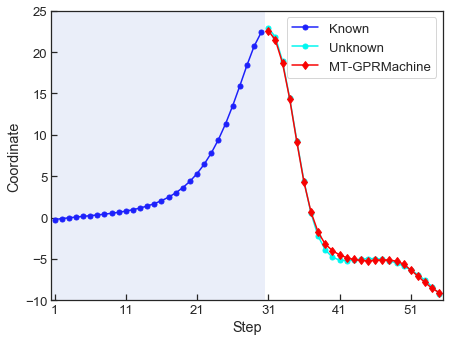

In [43]:
train_len = n_train
tot_len = n_train + n_test
msize=5
facecolor = '#EAEEF9'
fig, ax = plt.subplots(figsize=(6.5, 5))
ax.axvspan(-.5, train_len - .5, facecolor=facecolor, zorder=-1)
lines = []

l1 = ax.plot(range(train_len), known, marker='o', c='#1D21FB', 
        ms=msize, label='Known')
l2 = ax.plot(range(train_len, tot_len), truth, marker='o', 
        c='#00F7F0', ms=msize, label='Unknown')
l3 = ax.plot(range(train_len, tot_len), pred, marker='d', 
        c='#F80202', ms=msize*1.2, 
        #markerfacecolor='none', 
        label='MT-GPRMachine')
ax.set_ylim(-10, 25)
ax.set_xticks(range(0, tot_len, 10))
ax.set_xticklabels(np.arange(1, tot_len + 1, 10))
ax.set_xlim(-.5, tot_len - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()

### Lorentz_18

In [45]:
example = 'Lorentz'
target = 17
n_start = 0
n_train = 30
n_test = 25
noise_level = 0
n_task = 5
n_iter = 1000
k_low_list = [1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55,
              1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 5.25, 5.25,
              3.25, 3.25, 3.25]
k_up_list = [3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 3.55,
             3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 3.55, 6.55, 6.55,
             4.55, 4.55, 4.55]

In [46]:
rdata = np.loadtxt('../data/{}.txt'.format(example))

In [47]:
rdata_n = rdata + np.random.uniform(0, noise_level, np.shape(rdata))

In [48]:
DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata_n)

In [49]:
trainer = gpm.train.MultipleTrainer()

mu_list, var_list, mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 25 ...
    >>> Training process is running for group 2 in total of 25 ...
    >>> Training process is running for group 3 in total of 25 ...
    >>> Training process is running for group 4 in total of 25 ...
    >>> Training process is running for group 5 in total of 25 ...
    >>> Training process is running for group 6 in total of 25 ...
    >>> Training process is running for group 7 in total of 25 ...
    >>> Training process is running for group 8 in total of 25 ...
    >>> Training process is running for group 9 in total of 25 ...
    >>> Training process is running for group 10 in total of 25 ...
    >>> Training process is running for group 11 in total of 25 ...
    >>> Training process is running for group 12 in total of 25 ...
    >>> Training process is running for group 13 in total of 25 ...
    >>> Training process is running for group 14 in total of 25 ...
    >>> Training process is running for group 15 in total

In [50]:
scaler = pp.MinMaxScaler()
X = rdata_n
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [51]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

In [ ]:
train_len = n_train
tot_len = n_train + n_test
msize=5
facecolor = '#EAEEF9'
fig, ax = plt.subplots(figsize=(6.5, 5))
ax.axvspan(-.5, train_len - .5, facecolor=facecolor, zorder=-1)
lines = []

l1 = ax.plot(range(train_len), known, marker='o', c='#1D21FB', 
        ms=msize, label='Known')
l2 = ax.plot(range(train_len, tot_len), truth, marker='o', 
        c='#00F7F0', ms=msize, label='Unknown')
l3 = ax.plot(range(train_len, tot_len), pred, marker='d', 
        c='#F80202', ms=msize*1.2, 
        #markerfacecolor='none', 
        label='MT-GPRMachine')
ax.set_ylim(5, 45)
ax.set_xticks(range(0, tot_len, 10))
ax.set_xticklabels(np.arange(1, tot_len + 1, 10))
ax.set_xlim(-.5, tot_len - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()